In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("matches.csv", index_col=0)

In [3]:
df.head()

,date,time,comp,round,day,venue,result,gf,ga,opponent,...,match report,notes,sh,sot,dist,fk,pk,pkatt,season,team
1,2023-08-12,12:30,Premier League,Matchweek 1,Sat,Home,W,2.0,1.0,Nott'ham Forest,...,Match Report,NaN,15.0,7.0,19.1,0.0,0,0,2024,Arsenal
2,2023-08-21,20:00,Premier League,Matchweek 2,Mon,Away,W,1.0,0.0,Crystal Palace,...,Match Report,NaN,13.0,2.0,16.4,0.0,1,1,2024,Arsenal
3,2023-08-26,15:00,Premier League,Matchweek 3,Sat,Home,D,2.0,2.0,Fulham,...,Match Report,NaN,18.0,9.0,13.8,0.0,1,1,2024,Arsenal
4,2023-09-03,16:30,Premier League,Matchweek 4,Sun,Home,W,3.0,1.0,Manchester Utd,...,Match Report,NaN,17.0,5.0,15.0,0.0,0,0,2024,Arsenal
5,2023-09-17,16:30,Premier League,Matchweek 5,Sun,Away,W,1.0,0.0,Everton,...,Match Report,NaN,13.0,4.0,17.4,0.0,0,0,2024,Arsenal


In [4]:
df.shape

(1420, 27)

In [5]:
df.isnull().sum()

date               0
time               0
comp               0
round              0
day                0
venue              0
result             0
gf                 0
ga                 0
opponent           0
xg                 0
xga                0
poss               0
attendance         6
captain            0
formation          0
referee            0
match report       0
notes           1420
sh                 0
sot                0
dist               0
fk                 0
pk                 0
pkatt              0
season             0
team               0
dtype: int64

In [6]:
df.duplicated().sum()

0

In [7]:
df['team'].nunique()

23

In [8]:
df["team"].value_counts()

team
Fulham                      72
Nottingham Forest           72
Aston Villa                 72
Brentford                   72
West Ham United             72
Wolverhampton Wanderers     71
Everton                     71
Crystal Palace              71
Bournemouth                 71
Liverpool                   71
Arsenal                     71
Brighton and Hove Albion    70
Manchester United           70
Newcastle United            70
Tottenham Hotspur           70
Manchester City             70
Chelsea                     69
Leicester City              38
Leeds United                38
Southampton                 38
Luton Town                  34
Burnley                     34
Sheffield United            33
Name: count, dtype: int64

In [9]:
df["round"].value_counts()

round
Matchweek 1     40
Matchweek 17    40
Matchweek 33    40
Matchweek 32    40
Matchweek 31    40
Matchweek 30    40
Matchweek 28    40
Matchweek 27    40
Matchweek 25    40
Matchweek 24    40
Matchweek 23    40
Matchweek 22    40
Matchweek 21    40
Matchweek 2     40
Matchweek 19    40
Matchweek 18    40
Matchweek 20    40
Matchweek 16    40
Matchweek 8     40
Matchweek 3     40
Matchweek 4     40
Matchweek 5     40
Matchweek 6     40
Matchweek 15    40
Matchweek 7     40
Matchweek 9     40
Matchweek 10    40
Matchweek 11    40
Matchweek 12    40
Matchweek 13    40
Matchweek 14    40
Matchweek 26    38
Matchweek 34    34
Matchweek 29    28
Matchweek 35    20
Matchweek 36    20
Matchweek 37    20
Matchweek 38    20
Name: count, dtype: int64

In [10]:
df.dtypes

date             object
time             object
comp             object
round            object
day              object
venue            object
result           object
gf              float64
ga              float64
opponent         object
xg              float64
xga             float64
poss            float64
attendance      float64
captain          object
formation        object
referee          object
match report     object
notes           float64
sh              float64
sot             float64
dist            float64
fk              float64
pk                int64
pkatt             int64
season            int64
team             object
dtype: object

In [11]:
df = df.drop(columns=["comp","notes"])

In [12]:
df.dtypes

date             object
time             object
round            object
day              object
venue            object
result           object
gf              float64
ga              float64
opponent         object
xg              float64
xga             float64
poss            float64
attendance      float64
captain          object
formation        object
referee          object
match report     object
sh              float64
sot             float64
dist            float64
fk              float64
pk                int64
pkatt             int64
season            int64
team             object
dtype: object

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

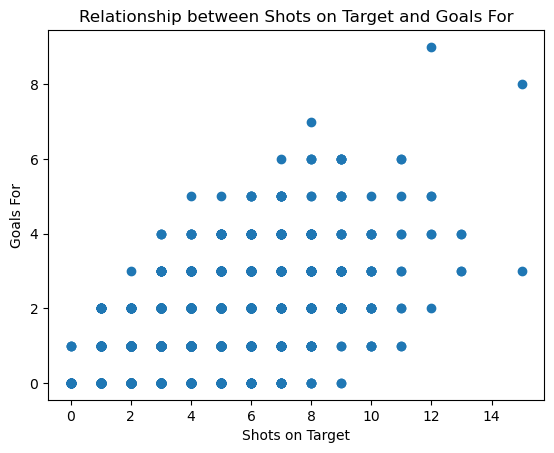

In [14]:
plt.scatter(df['sot'], df['gf'])
plt.xlabel('Shots on Target')
plt.ylabel('Goals For')
plt.title('Relationship between Shots on Target and Goals For')
plt.show()

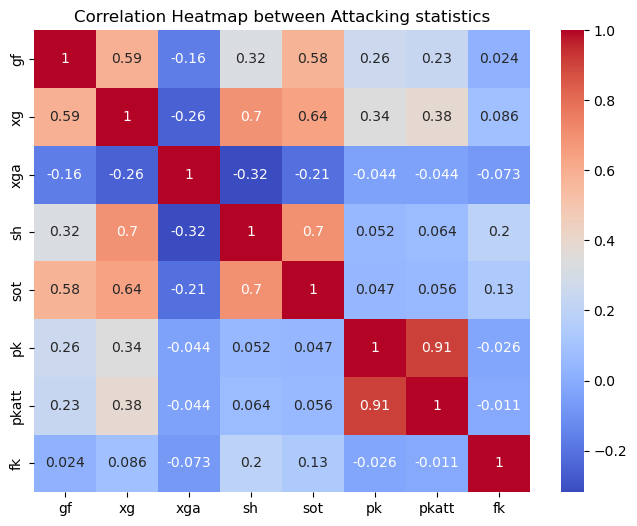

In [15]:
corr_matrix = df[["gf","xg","xga","sh","sot","pk","pkatt","fk"]].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap between Attacking statistics')
plt.show()

In [16]:
df["date"] = pd.to_datetime(df["date"])

In [17]:
df["target"] = (df["result"] == "W").astype("int")

In [18]:
df

,date,time,round,day,venue,result,gf,ga,opponent,xg,...,match report,sh,sot,dist,fk,pk,pkatt,season,team,target
1,2023-08-12,12:30,Matchweek 1,Sat,Home,W,2.0,1.0,Nott'ham Forest,0.8,...,Match Report,15.0,7.0,19.1,0.0,0,0,2024,Arsenal,1
2,2023-08-21,20:00,Matchweek 2,Mon,Away,W,1.0,0.0,Crystal Palace,2.0,...,Match Report,13.0,2.0,16.4,0.0,1,1,2024,Arsenal,1
3,2023-08-26,15:00,Matchweek 3,Sat,Home,D,2.0,2.0,Fulham,3.2,...,Match Report,18.0,9.0,13.8,0.0,1,1,2024,Arsenal,0
4,2023-09-03,16:30,Matchweek 4,Sun,Home,W,3.0,1.0,Manchester Utd,2.3,...,Match Report,17.0,5.0,15.0,0.0,0,0,2024,Arsenal,1
5,2023-09-17,16:30,Matchweek 5,Sun,Away,W,1.0,0.0,Everton,1.0,...,Match Report,13.0,4.0,17.4,0.0,0,0,2024,Arsenal,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42,2023-04-30,14:00,Matchweek 34,Sun,Away,L,1.0,3.0,Newcastle Utd,0.8,...,Match Report,4.0,3.0,17.3,0.0,0,0,2023,Southampton,0
43,2023-05-08,20:00,Matchweek 35,Mon,Away,L,3.0,4.0,Nott'ham Forest,3.1,...,Match Report,18.0,4.0,14.0,0.0,1,1,2023,Southampton,0
44,2023-05-13,15:00,Matchweek 36,Sat,Home,L,0.0,2.0,Fulham,0.4,...,Match Report,5.0,1.0,24.2,0.0,0,0,2023,Southampton,0
45,2023-05-21,14:00,Matchweek 37,Sun,Away,L,1.0,3.0,Brighton,0.6,...,Match Report,5.0,1.0,13.8,1.0,0,0,2023,Southampton,0


In [19]:
df["venue_code"] = df["venue"].astype("category").cat.codes

In [20]:
df["opp_code"] = df["opponent"].astype("category").cat.codes

In [21]:
df["hour"] = df["time"].str.replace(":.+", "", regex=True).astype("int")

In [22]:
df['day'].unique()

array(['Sat', 'Mon', 'Sun', 'Tue', 'Thu', 'Wed', 'Fri'], dtype=object)

In [23]:
df["day_code"] = df["date"].dt.dayofweek

In [24]:
df

,date,time,round,day,venue,result,gf,ga,opponent,xg,...,fk,pk,pkatt,season,team,target,venue_code,opp_code,hour,day_code
1,2023-08-12,12:30,Matchweek 1,Sat,Home,W,2.0,1.0,Nott'ham Forest,0.8,...,0.0,0,0,2024,Arsenal,1,1,17,12,5
2,2023-08-21,20:00,Matchweek 2,Mon,Away,W,1.0,0.0,Crystal Palace,2.0,...,0.0,1,1,2024,Arsenal,1,0,7,20,0
3,2023-08-26,15:00,Matchweek 3,Sat,Home,D,2.0,2.0,Fulham,3.2,...,0.0,1,1,2024,Arsenal,0,1,9,15,5
4,2023-09-03,16:30,Matchweek 4,Sun,Home,W,3.0,1.0,Manchester Utd,2.3,...,0.0,0,0,2024,Arsenal,1,1,15,16,6
5,2023-09-17,16:30,Matchweek 5,Sun,Away,W,1.0,0.0,Everton,1.0,...,0.0,0,0,2024,Arsenal,1,0,8,16,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42,2023-04-30,14:00,Matchweek 34,Sun,Away,L,1.0,3.0,Newcastle Utd,0.8,...,0.0,0,0,2023,Southampton,0,0,16,14,6
43,2023-05-08,20:00,Matchweek 35,Mon,Away,L,3.0,4.0,Nott'ham Forest,3.1,...,0.0,1,1,2023,Southampton,0,0,17,20,0
44,2023-05-13,15:00,Matchweek 36,Sat,Home,L,0.0,2.0,Fulham,0.4,...,0.0,0,0,2023,Southampton,0,1,9,15,5
45,2023-05-21,14:00,Matchweek 37,Sun,Away,L,1.0,3.0,Brighton,0.6,...,1.0,0,0,2023,Southampton,0,0,4,14,6


In [25]:
df.shape

(1420, 30)

In [26]:
from sklearn.ensemble import RandomForestClassifier

In [27]:
rf = RandomForestClassifier(n_estimators=50, min_samples_split=10, random_state=1)

In [28]:
train = df[df["date"] < '2024-01-01']

In [29]:
test = df[df["date"] > '2024-01-01']

In [30]:
predictors = ["gf","xg","xga","sh","sot","pk","pkatt","fk","opp_code", "venue_code", "hour", "day_code"]

In [31]:
rf.fit(train[predictors], train["target"])

RandomForestClassifier(min_samples_split=10, n_estimators=50, random_state=1)

In [32]:
pred_rf = rf.predict(test[predictors])

In [33]:
from sklearn.metrics import accuracy_score

In [34]:
acc_rf = accuracy_score(test["target"], pred_rf)

In [35]:
round(acc_rf, 4)

0.8647

In [36]:
combined = pd.DataFrame(dict(actual=test["target"], predicted=pred_rf))

In [37]:
pd.crosstab(index=combined["actual"], columns=combined["predicted"])

predicted,0,1
actual,,
0,149,22
1,14,81


In [38]:
from sklearn.metrics import precision_score, recall_score

In [39]:
round(precision_score(test["target"], pred_rf), 4)

0.7864

In [40]:
round(recall_score(test["target"],pred_rf), 4)

0.8526

In [41]:
import xgboost as xgb

In [42]:
xgb_model = xgb.XGBClassifier(random_state=42)

In [43]:
xgb_model.fit(train[predictors], train["target"])

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

In [44]:
pred_xgb = xgb_model.predict(test[predictors])

In [45]:
acc_xgb = accuracy_score(test["target"], pred_xgb)

In [46]:
round(acc_xgb, 4)

0.8647

In [47]:
round(precision_score(test["target"], pred_xgb), 4)

0.781

In [48]:
round(recall_score(test["target"], pred_xgb), 4)

0.8632

In [49]:
combined = pd.DataFrame(dict(actual=test["target"], predicted=pred_xgb))

In [50]:
pd.crosstab(index=combined["actual"], columns=combined["predicted"])

predicted,0,1
actual,,
0,148,23
1,13,82


In [51]:
def rolling_averages(group, cols, new_cols):
    group = group.sort_values("date")
    rolling_stats = group[cols].rolling(3, closed='left').mean()
    group[new_cols] = rolling_stats
    group = group.dropna(subset=new_cols)
    return group

In [52]:
cols = ["gf","xg","xga","sh","sot","pk","pkatt","fk"]
new_cols = [f"{c}_rolling" for c in cols]

In [53]:
matches_rolling = df.groupby("team").apply(lambda x: rolling_averages(x, cols, new_cols))

In [54]:
matches_rolling

date   time         round  day venue result  \
team                                                                           
Arsenal                 3  2022-08-27  17:30   Matchweek 4  Sat  Home      W   
                        4  2022-08-31  19:30   Matchweek 5  Wed  Home      W   
                        5  2022-09-04  16:30   Matchweek 6  Sun  Away      L   
                        7  2022-09-18  12:00   Matchweek 8  Sun  Away      W   
                        8  2022-10-01  12:30   Matchweek 9  Sat  Home      W   
...                               ...    ...           ...  ...   ...    ...   
Wolverhampton Wanderers 35 2024-03-30  17:30  Matchweek 30  Sat  Away      L   
                        36 2024-04-02  19:45  Matchweek 31  Tue  Away      D   
                        37 2024-04-06  15:00  Matchweek 32  Sat  Home      L   
                        38 2024-04-13  15:00  Matchweek 33  Sat  Away      D   
                        39 2024-04-20  19:30  Matchweek 34  Sat  Home      L   

                             gf   ga         opponent   xg  ...  hour  \
team                                                        ...         
Arsenal                 3   2.0  1.0           Fulham  2.6  ...    17   
                        4   2.0  1.0      Aston Villa  2.4  ...    19   
                        5   1.0  3.0   Manchester Utd  1.3  ...    16   
                        7   3.0  0.0        Brentford  1.5  ...    12   
                        8   3.0  1.0        Tottenham  2.4  ...    12   
...                         ...  ...              ...  ...  ...   ...   
Wolverhampton Wanderers 35  0.0  2.0      Aston Villa  1.5  ...    17   
                        36  1.0  1.0          Burnley  0.9  ...    19   
                        37  1.0  2.0         West Ham  1.5  ...    15   
                        38  2.0  2.0  Nott'ham Forest  1.0  ...    15   
                        39  0.0  2.0          Arsenal  0.1  ...    19   

                            day_code  gf_rolling xg_rolling xga_rolling  \
team                                                                      
Arsenal                 3          5    3.000000   1.666667    0.666667   
                        4          2    3.000000   2.200000    0.533333   
                        5          6    2.333333   2.100000    0.500000   
                        7          6    1.666667   2.100000    0.900000   
                        8          5    2.000000   1.733333    0.800000   
...                              ...         ...        ...         ...   
Wolverhampton Wanderers 35         5    1.000000   0.966667    1.766667   
                        36         1    0.666667   1.033333    1.900000   
                        37         5    1.000000   1.066667    1.633333   
                        38         5    0.666667   1.300000    1.166667   
                        39         5    1.333333   1.133333    1.466667   

                           sh_rolling sot_rolling  pk_rolling  pkatt_rolling  \
team                                                                           
Arsenal                 3   14.333333    5.000000    0.000000       0.000000   
                        4   18.333333    7.000000    0.000000       0.000000   
                        5   19.333333    7.333333    0.000000       0.000000   
                        7   20.000000    6.333333    0.000000       0.000000   
                        8   17.000000    6.000000    0.000000       0.000000   
...                               ...         ...         ...            ...   
Wolverhampton Wanderers 35  11.000000    2.666667    0.000000       0.000000   
                        36  11.000000    3.000000    0.000000       0.000000   
                        37   9.666667    2.666667    0.000000       0.000000   
                        38  11.333333    3.666667    0.333333       0.333333   
                        39  10.666667    3.666667    0.333333       0.333333   

                         

In [55]:
matches_rolling.index = range(matches_rolling.shape[0])

In [56]:
def make_predictions(data, predictors):
    train = data[data["date"] < '2024-01-01']
    test = data[data["date"] > '2024-01-01']
    rf.fit(train[predictors], train["target"])
    pred = rf.predict(test[predictors])
    combined = pd.DataFrame(dict(actual=test["target"], predicted=pred), index=test.index)
    acc = accuracy_score(test["target"], pred)
    return combined, acc

In [57]:
combined, acc = make_predictions(matches_rolling, predictors + new_cols)

In [58]:
round(acc, 4)

0.8684

In [59]:
combined.shape

(266, 2)

In [60]:
combined

,actual,predicted
55,1,1
56,1,1
57,1,1
58,1,1
59,1,1
...,...,...
1346,0,0
1347,0,0
1348,0,0
1349,0,0


In [61]:
combined = combined.merge(matches_rolling[["date", "team", "opponent","result"]], left_index=True, right_index=True)

In [62]:
combined.head()

,actual,predicted,date,team,opponent,result
55,1,1,2024-01-20,Arsenal,Crystal Palace,W
56,1,1,2024-01-30,Arsenal,Nott'ham Forest,W
57,1,1,2024-02-04,Arsenal,Liverpool,W
58,1,1,2024-02-11,Arsenal,West Ham,W
59,1,1,2024-02-17,Arsenal,Burnley,W


In [63]:
combined.to_csv('res.csv')